In [23]:
import import_ipynb
from DataProcessing import Data
from xgboost_impl import Xgboost
from catboost_impl import CatBoost

import os
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

from sklearn.metrics import mean_absolute_error

In [2]:
train_a = pd.read_parquet('dataset/A/train_targets.parquet')
train_b = pd.read_parquet('dataset/B/train_targets.parquet')
train_c = pd.read_parquet('dataset/C/train_targets.parquet')

X_train_observed_a = pd.read_parquet('dataset/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('dataset/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('dataset/C/X_train_observed.parquet')

X_train_estimated_a = pd.read_parquet('dataset/A/X_train_estimated.parquet') 
X_train_estimated_b = pd.read_parquet('dataset/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('dataset/C/X_train_estimated.parquet')

X_test_estimated_a = pd.read_parquet('dataset/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('dataset/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('dataset/C/X_test_estimated.parquet')

In [3]:
data = Data(train_a, train_b, train_c, X_train_observed_a, X_train_observed_b, X_train_observed_c,
                      X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_test_estimated_a, 
                      X_test_estimated_b, X_test_estimated_c)

In [4]:
xg = Xgboost(data)
cb = CatBoost(data)

In [5]:
xg.fit()

[0]	validation_0-mae:825.24660	validation_1-mae:751.58118
[1]	validation_0-mae:790.75866	validation_1-mae:719.81912
[2]	validation_0-mae:758.02962	validation_1-mae:690.09321
[3]	validation_0-mae:726.94172	validation_1-mae:662.16158
[4]	validation_0-mae:697.64823	validation_1-mae:635.77397
[5]	validation_0-mae:670.01537	validation_1-mae:610.96448
[6]	validation_0-mae:644.14641	validation_1-mae:587.21586
[7]	validation_0-mae:619.80807	validation_1-mae:565.27945
[8]	validation_0-mae:596.85079	validation_1-mae:544.45804
[9]	validation_0-mae:575.00121	validation_1-mae:524.89725
[10]	validation_0-mae:554.49660	validation_1-mae:505.92018
[11]	validation_0-mae:535.06345	validation_1-mae:488.68523
[12]	validation_0-mae:516.73513	validation_1-mae:472.04075
[13]	validation_0-mae:499.41308	validation_1-mae:456.63153
[14]	validation_0-mae:483.32449	validation_1-mae:442.14344
[15]	validation_0-mae:467.97185	validation_1-mae:428.78475
[16]	validation_0-mae:453.52526	validation_1-mae:415.92552
[17]	va

[139]	validation_0-mae:142.82669	validation_1-mae:161.93245
[140]	validation_0-mae:142.46783	validation_1-mae:161.84866
[141]	validation_0-mae:142.16748	validation_1-mae:161.74114
[142]	validation_0-mae:141.92452	validation_1-mae:161.68317
[143]	validation_0-mae:141.50635	validation_1-mae:161.63422
[144]	validation_0-mae:141.16083	validation_1-mae:161.55460
[145]	validation_0-mae:140.81148	validation_1-mae:161.55382
[146]	validation_0-mae:140.45676	validation_1-mae:161.58661
[147]	validation_0-mae:140.24513	validation_1-mae:161.56797
[148]	validation_0-mae:139.92252	validation_1-mae:161.57546
[149]	validation_0-mae:139.58270	validation_1-mae:161.51316
[150]	validation_0-mae:139.19259	validation_1-mae:161.47228
[151]	validation_0-mae:138.79837	validation_1-mae:161.43337
[152]	validation_0-mae:138.45917	validation_1-mae:161.37507
[153]	validation_0-mae:138.09855	validation_1-mae:161.25023
[154]	validation_0-mae:137.72847	validation_1-mae:161.20573
[155]	validation_0-mae:137.47975	validat

[276]	validation_0-mae:106.61150	validation_1-mae:159.25995
[277]	validation_0-mae:106.38346	validation_1-mae:159.24552
[278]	validation_0-mae:106.19314	validation_1-mae:159.24585
[279]	validation_0-mae:105.91985	validation_1-mae:159.22143
[280]	validation_0-mae:105.72759	validation_1-mae:159.23763
[281]	validation_0-mae:105.51576	validation_1-mae:159.29565
[282]	validation_0-mae:105.31737	validation_1-mae:159.30720
[283]	validation_0-mae:105.10282	validation_1-mae:159.33224
[284]	validation_0-mae:104.88382	validation_1-mae:159.33018
[285]	validation_0-mae:104.67382	validation_1-mae:159.32734
[286]	validation_0-mae:104.46666	validation_1-mae:159.32736
[287]	validation_0-mae:104.24858	validation_1-mae:159.34999
[288]	validation_0-mae:104.02350	validation_1-mae:159.36331
[289]	validation_0-mae:103.79286	validation_1-mae:159.34812
[290]	validation_0-mae:103.59172	validation_1-mae:159.33308
[291]	validation_0-mae:103.39756	validation_1-mae:159.30954
[292]	validation_0-mae:103.22613	validat

[415]	validation_0-mae:82.81084	validation_1-mae:159.29963
[416]	validation_0-mae:82.64522	validation_1-mae:159.34501
[417]	validation_0-mae:82.52868	validation_1-mae:159.36728
[418]	validation_0-mae:82.38286	validation_1-mae:159.40419
[419]	validation_0-mae:82.26141	validation_1-mae:159.42488
[420]	validation_0-mae:82.09617	validation_1-mae:159.39597
[421]	validation_0-mae:81.94901	validation_1-mae:159.41137
[422]	validation_0-mae:81.79580	validation_1-mae:159.41899
[423]	validation_0-mae:81.66525	validation_1-mae:159.39382
[424]	validation_0-mae:81.51976	validation_1-mae:159.39238
[425]	validation_0-mae:81.42120	validation_1-mae:159.39813
[426]	validation_0-mae:81.26434	validation_1-mae:159.40540
[427]	validation_0-mae:81.12854	validation_1-mae:159.40709
[428]	validation_0-mae:80.99444	validation_1-mae:159.43771
[429]	validation_0-mae:80.83800	validation_1-mae:159.40693
[430]	validation_0-mae:80.67892	validation_1-mae:159.41595
[431]	validation_0-mae:80.53534	validation_1-mae:159.450

[554]	validation_0-mae:66.11283	validation_1-mae:159.38048
[555]	validation_0-mae:66.00016	validation_1-mae:159.39763
[556]	validation_0-mae:65.89115	validation_1-mae:159.39766
[557]	validation_0-mae:65.80505	validation_1-mae:159.40273
[558]	validation_0-mae:65.72157	validation_1-mae:159.40146
[559]	validation_0-mae:65.58483	validation_1-mae:159.40707
[560]	validation_0-mae:65.47869	validation_1-mae:159.38606
[561]	validation_0-mae:65.36672	validation_1-mae:159.42388
[562]	validation_0-mae:65.26959	validation_1-mae:159.42629
[563]	validation_0-mae:65.15518	validation_1-mae:159.41292
[564]	validation_0-mae:65.04057	validation_1-mae:159.42374
[565]	validation_0-mae:64.93483	validation_1-mae:159.43471
[566]	validation_0-mae:64.82493	validation_1-mae:159.45612
[567]	validation_0-mae:64.72150	validation_1-mae:159.44586
[568]	validation_0-mae:64.64870	validation_1-mae:159.44554
[569]	validation_0-mae:64.53353	validation_1-mae:159.43453
[570]	validation_0-mae:64.44879	validation_1-mae:159.452

[693]	validation_0-mae:53.49486	validation_1-mae:159.46203
[694]	validation_0-mae:53.40230	validation_1-mae:159.44786
[695]	validation_0-mae:53.30996	validation_1-mae:159.46550
[696]	validation_0-mae:53.21793	validation_1-mae:159.47301
[697]	validation_0-mae:53.12695	validation_1-mae:159.46035
[698]	validation_0-mae:53.02527	validation_1-mae:159.46134
[699]	validation_0-mae:52.94772	validation_1-mae:159.47908
[700]	validation_0-mae:52.87132	validation_1-mae:159.50184
[701]	validation_0-mae:52.80196	validation_1-mae:159.48704
[702]	validation_0-mae:52.74497	validation_1-mae:159.49726
[703]	validation_0-mae:52.65087	validation_1-mae:159.50459
[704]	validation_0-mae:52.56199	validation_1-mae:159.52179
[705]	validation_0-mae:52.48490	validation_1-mae:159.52709
[706]	validation_0-mae:52.40787	validation_1-mae:159.52527
[707]	validation_0-mae:52.31586	validation_1-mae:159.50863
[708]	validation_0-mae:52.23229	validation_1-mae:159.51050
[709]	validation_0-mae:52.14592	validation_1-mae:159.530

[832]	validation_0-mae:43.74304	validation_1-mae:159.76688
[833]	validation_0-mae:43.70272	validation_1-mae:159.76126
[834]	validation_0-mae:43.65112	validation_1-mae:159.79941
[835]	validation_0-mae:43.59352	validation_1-mae:159.79970
[836]	validation_0-mae:43.53655	validation_1-mae:159.80073
[837]	validation_0-mae:43.46609	validation_1-mae:159.77888
[838]	validation_0-mae:43.41178	validation_1-mae:159.79598
[839]	validation_0-mae:43.34011	validation_1-mae:159.79415
[840]	validation_0-mae:43.27759	validation_1-mae:159.78768
[841]	validation_0-mae:43.23087	validation_1-mae:159.77219
[842]	validation_0-mae:43.16914	validation_1-mae:159.77864
[843]	validation_0-mae:43.10020	validation_1-mae:159.78671
[844]	validation_0-mae:43.04128	validation_1-mae:159.77850
[845]	validation_0-mae:42.99056	validation_1-mae:159.77319
[846]	validation_0-mae:42.93287	validation_1-mae:159.77066
[847]	validation_0-mae:42.88060	validation_1-mae:159.76762
[848]	validation_0-mae:42.82255	validation_1-mae:159.778

[971]	validation_0-mae:36.07540	validation_1-mae:160.04774
[972]	validation_0-mae:36.03309	validation_1-mae:160.04374
[973]	validation_0-mae:35.99724	validation_1-mae:160.04830
[974]	validation_0-mae:35.94931	validation_1-mae:160.04672
[975]	validation_0-mae:35.89724	validation_1-mae:160.06288
[976]	validation_0-mae:35.83948	validation_1-mae:160.06765
[977]	validation_0-mae:35.78718	validation_1-mae:160.07798
[978]	validation_0-mae:35.73846	validation_1-mae:160.07061
[979]	validation_0-mae:35.69401	validation_1-mae:160.07792
[980]	validation_0-mae:35.64038	validation_1-mae:160.07360
[981]	validation_0-mae:35.59963	validation_1-mae:160.08140
[982]	validation_0-mae:35.55403	validation_1-mae:160.08320
[983]	validation_0-mae:35.51394	validation_1-mae:160.08995
[984]	validation_0-mae:35.47046	validation_1-mae:160.09299
[985]	validation_0-mae:35.42669	validation_1-mae:160.07792
[986]	validation_0-mae:35.39340	validation_1-mae:160.07876
[987]	validation_0-mae:35.34139	validation_1-mae:160.086

[1109]	validation_0-mae:30.01733	validation_1-mae:160.13082
[1110]	validation_0-mae:29.97366	validation_1-mae:160.13323
[1111]	validation_0-mae:29.93271	validation_1-mae:160.12134
[1112]	validation_0-mae:29.89159	validation_1-mae:160.12422
[1113]	validation_0-mae:29.85583	validation_1-mae:160.12893
[1114]	validation_0-mae:29.81818	validation_1-mae:160.13064
[1115]	validation_0-mae:29.79050	validation_1-mae:160.12902
[1116]	validation_0-mae:29.76129	validation_1-mae:160.14038
[1117]	validation_0-mae:29.71666	validation_1-mae:160.12378
[1118]	validation_0-mae:29.67585	validation_1-mae:160.11753
[1119]	validation_0-mae:29.64229	validation_1-mae:160.11711
[1120]	validation_0-mae:29.60494	validation_1-mae:160.12347
[1121]	validation_0-mae:29.56622	validation_1-mae:160.11762
[1122]	validation_0-mae:29.53814	validation_1-mae:160.11811
[1123]	validation_0-mae:29.51091	validation_1-mae:160.11395
[1124]	validation_0-mae:29.48298	validation_1-mae:160.11852
[1125]	validation_0-mae:29.44555	validat

[1246]	validation_0-mae:25.21595	validation_1-mae:160.27787
[1247]	validation_0-mae:25.17781	validation_1-mae:160.27147
[1248]	validation_0-mae:25.14899	validation_1-mae:160.29076
[1249]	validation_0-mae:25.11307	validation_1-mae:160.29643
[1250]	validation_0-mae:25.07413	validation_1-mae:160.29733
[1251]	validation_0-mae:25.04406	validation_1-mae:160.30154
[1252]	validation_0-mae:25.01084	validation_1-mae:160.30671
[1253]	validation_0-mae:24.98583	validation_1-mae:160.31037
[1254]	validation_0-mae:24.94432	validation_1-mae:160.31541
[1255]	validation_0-mae:24.91356	validation_1-mae:160.29929
[1256]	validation_0-mae:24.88815	validation_1-mae:160.29625
[1257]	validation_0-mae:24.86388	validation_1-mae:160.29478
[1258]	validation_0-mae:24.83635	validation_1-mae:160.29908
[1259]	validation_0-mae:24.80016	validation_1-mae:160.30491
[1260]	validation_0-mae:24.77530	validation_1-mae:160.30291
[1261]	validation_0-mae:24.74638	validation_1-mae:160.30532
[1262]	validation_0-mae:24.71764	validat

[1383]	validation_0-mae:21.29254	validation_1-mae:160.44363
[1384]	validation_0-mae:21.26588	validation_1-mae:160.43912
[1385]	validation_0-mae:21.24537	validation_1-mae:160.44835
[1386]	validation_0-mae:21.22065	validation_1-mae:160.44849
[1387]	validation_0-mae:21.19759	validation_1-mae:160.44820
[1388]	validation_0-mae:21.16904	validation_1-mae:160.45037
[1389]	validation_0-mae:21.14062	validation_1-mae:160.44746
[1390]	validation_0-mae:21.11583	validation_1-mae:160.45750
[1391]	validation_0-mae:21.08404	validation_1-mae:160.45964
[1392]	validation_0-mae:21.05967	validation_1-mae:160.45906
[1393]	validation_0-mae:21.03544	validation_1-mae:160.46405
[1394]	validation_0-mae:21.01574	validation_1-mae:160.45995
[1395]	validation_0-mae:20.98886	validation_1-mae:160.46138
[1396]	validation_0-mae:20.96924	validation_1-mae:160.46513
[1397]	validation_0-mae:20.94447	validation_1-mae:160.47300
[1398]	validation_0-mae:20.92182	validation_1-mae:160.47720
[1399]	validation_0-mae:20.89464	validat

[1520]	validation_0-mae:18.05682	validation_1-mae:160.54207
[1521]	validation_0-mae:18.03467	validation_1-mae:160.53887
[1522]	validation_0-mae:18.01314	validation_1-mae:160.53747
[1523]	validation_0-mae:17.99138	validation_1-mae:160.54159
[1524]	validation_0-mae:17.97142	validation_1-mae:160.54769
[1525]	validation_0-mae:17.95148	validation_1-mae:160.54794
[1526]	validation_0-mae:17.93585	validation_1-mae:160.54702
[1527]	validation_0-mae:17.91456	validation_1-mae:160.54533
[1528]	validation_0-mae:17.89071	validation_1-mae:160.55356
[1529]	validation_0-mae:17.87090	validation_1-mae:160.55213
[1530]	validation_0-mae:17.84938	validation_1-mae:160.55755
[1531]	validation_0-mae:17.82683	validation_1-mae:160.55331
[1532]	validation_0-mae:17.80643	validation_1-mae:160.56139
[1533]	validation_0-mae:17.78496	validation_1-mae:160.56048
[1534]	validation_0-mae:17.76234	validation_1-mae:160.56444
[1535]	validation_0-mae:17.74231	validation_1-mae:160.56957
[1536]	validation_0-mae:17.71813	validat

[1657]	validation_0-mae:15.42091	validation_1-mae:160.65123
[1658]	validation_0-mae:15.40597	validation_1-mae:160.65249
[1659]	validation_0-mae:15.38756	validation_1-mae:160.65831
[1660]	validation_0-mae:15.37029	validation_1-mae:160.64927
[1661]	validation_0-mae:15.35174	validation_1-mae:160.65192
[1662]	validation_0-mae:15.33130	validation_1-mae:160.65024
[1663]	validation_0-mae:15.31248	validation_1-mae:160.65300
[1664]	validation_0-mae:15.29492	validation_1-mae:160.65500
[1665]	validation_0-mae:15.27823	validation_1-mae:160.65707
[1666]	validation_0-mae:15.25716	validation_1-mae:160.65866
[1667]	validation_0-mae:15.23858	validation_1-mae:160.66160
[1668]	validation_0-mae:15.22426	validation_1-mae:160.66037
[1669]	validation_0-mae:15.20752	validation_1-mae:160.65711
[1670]	validation_0-mae:15.19173	validation_1-mae:160.66405
[1671]	validation_0-mae:15.17230	validation_1-mae:160.66748
[1672]	validation_0-mae:15.15401	validation_1-mae:160.67174
[1673]	validation_0-mae:15.14008	validat

C:\Users\marti\anaconda3\envs\tf\lib\site-packages\xgboost\core.py:160: UserWarning: [11:21:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


14.790031630340112 160.69107922526422
[0]	validation_0-mae:147.67375	validation_1-mae:123.02836
[1]	validation_0-mae:141.61700	validation_1-mae:117.97485
[2]	validation_0-mae:135.77203	validation_1-mae:113.25000
[3]	validation_0-mae:130.31387	validation_1-mae:108.77993
[4]	validation_0-mae:125.11922	validation_1-mae:104.43597
[5]	validation_0-mae:120.18040	validation_1-mae:100.37565
[6]	validation_0-mae:115.56161	validation_1-mae:96.53057
[7]	validation_0-mae:111.18285	validation_1-mae:92.89192
[8]	validation_0-mae:107.03923	validation_1-mae:89.53723
[9]	validation_0-mae:103.05854	validation_1-mae:86.28900
[10]	validation_0-mae:99.37883	validation_1-mae:83.19915
[11]	validation_0-mae:95.84010	validation_1-mae:80.29677
[12]	validation_0-mae:92.47609	validation_1-mae:77.47360
[13]	validation_0-mae:89.30304	validation_1-mae:74.87165
[14]	validation_0-mae:86.35720	validation_1-mae:72.35409
[15]	validation_0-mae:83.52411	validation_1-mae:69.95882
[16]	validation_0-mae:80.83583	validation_1-

[143]	validation_0-mae:25.58295	validation_1-mae:24.18710
[144]	validation_0-mae:25.54276	validation_1-mae:24.18206
[145]	validation_0-mae:25.48362	validation_1-mae:24.20386
[146]	validation_0-mae:25.44320	validation_1-mae:24.20701
[147]	validation_0-mae:25.41408	validation_1-mae:24.20415
[148]	validation_0-mae:25.36283	validation_1-mae:24.19320
[149]	validation_0-mae:25.31827	validation_1-mae:24.18490
[150]	validation_0-mae:25.27970	validation_1-mae:24.18001
[151]	validation_0-mae:25.23006	validation_1-mae:24.17861
[152]	validation_0-mae:25.17938	validation_1-mae:24.17522
[153]	validation_0-mae:25.13757	validation_1-mae:24.16201
[154]	validation_0-mae:25.10997	validation_1-mae:24.16150
[155]	validation_0-mae:25.07349	validation_1-mae:24.17393
[156]	validation_0-mae:25.02146	validation_1-mae:24.17688
[157]	validation_0-mae:24.97469	validation_1-mae:24.17378
[158]	validation_0-mae:24.92682	validation_1-mae:24.17293
[159]	validation_0-mae:24.87745	validation_1-mae:24.16523
[160]	validati

[285]	validation_0-mae:20.74475	validation_1-mae:24.43918
[286]	validation_0-mae:20.72194	validation_1-mae:24.44690
[287]	validation_0-mae:20.69925	validation_1-mae:24.45675
[288]	validation_0-mae:20.68526	validation_1-mae:24.47345
[289]	validation_0-mae:20.65958	validation_1-mae:24.47084
[290]	validation_0-mae:20.63272	validation_1-mae:24.47185
[291]	validation_0-mae:20.61617	validation_1-mae:24.46963
[292]	validation_0-mae:20.58453	validation_1-mae:24.47225
[293]	validation_0-mae:20.55990	validation_1-mae:24.46957
[294]	validation_0-mae:20.53867	validation_1-mae:24.47899
[295]	validation_0-mae:20.51441	validation_1-mae:24.46968
[296]	validation_0-mae:20.48726	validation_1-mae:24.47610
[297]	validation_0-mae:20.46574	validation_1-mae:24.48222
[298]	validation_0-mae:20.42955	validation_1-mae:24.48421
[299]	validation_0-mae:20.39526	validation_1-mae:24.49140
[300]	validation_0-mae:20.36956	validation_1-mae:24.49129
[301]	validation_0-mae:20.34146	validation_1-mae:24.49777
[302]	validati

[427]	validation_0-mae:17.60127	validation_1-mae:24.96096
[428]	validation_0-mae:17.57745	validation_1-mae:24.96525
[429]	validation_0-mae:17.56132	validation_1-mae:24.96976
[430]	validation_0-mae:17.53775	validation_1-mae:24.97849
[431]	validation_0-mae:17.52369	validation_1-mae:24.98657
[432]	validation_0-mae:17.50380	validation_1-mae:24.98744
[433]	validation_0-mae:17.49089	validation_1-mae:24.99293
[434]	validation_0-mae:17.46876	validation_1-mae:24.99450
[435]	validation_0-mae:17.44771	validation_1-mae:24.99691
[436]	validation_0-mae:17.43634	validation_1-mae:25.00672
[437]	validation_0-mae:17.41910	validation_1-mae:25.00498
[438]	validation_0-mae:17.40963	validation_1-mae:25.00740
[439]	validation_0-mae:17.38496	validation_1-mae:25.00176
[440]	validation_0-mae:17.37311	validation_1-mae:25.00736
[441]	validation_0-mae:17.34615	validation_1-mae:25.00527
[442]	validation_0-mae:17.33143	validation_1-mae:25.02085
[443]	validation_0-mae:17.30414	validation_1-mae:25.02219
[444]	validati

[569]	validation_0-mae:15.18823	validation_1-mae:25.35128
[570]	validation_0-mae:15.17084	validation_1-mae:25.35298
[571]	validation_0-mae:15.15222	validation_1-mae:25.35884
[572]	validation_0-mae:15.13829	validation_1-mae:25.36429
[573]	validation_0-mae:15.12328	validation_1-mae:25.36135
[574]	validation_0-mae:15.10438	validation_1-mae:25.36464
[575]	validation_0-mae:15.09247	validation_1-mae:25.36480
[576]	validation_0-mae:15.07895	validation_1-mae:25.37788
[577]	validation_0-mae:15.06504	validation_1-mae:25.37178
[578]	validation_0-mae:15.04847	validation_1-mae:25.37303
[579]	validation_0-mae:15.03723	validation_1-mae:25.37758
[580]	validation_0-mae:15.02240	validation_1-mae:25.37871
[581]	validation_0-mae:15.00432	validation_1-mae:25.38022
[582]	validation_0-mae:14.99328	validation_1-mae:25.37425
[583]	validation_0-mae:14.97913	validation_1-mae:25.37283
[584]	validation_0-mae:14.96138	validation_1-mae:25.39011
[585]	validation_0-mae:14.94671	validation_1-mae:25.38780
[586]	validati

[711]	validation_0-mae:13.17579	validation_1-mae:25.57803
[712]	validation_0-mae:13.16188	validation_1-mae:25.57067
[713]	validation_0-mae:13.15010	validation_1-mae:25.56909
[714]	validation_0-mae:13.13479	validation_1-mae:25.57463
[715]	validation_0-mae:13.12012	validation_1-mae:25.56491
[716]	validation_0-mae:13.10520	validation_1-mae:25.57056
[717]	validation_0-mae:13.08770	validation_1-mae:25.56486
[718]	validation_0-mae:13.07343	validation_1-mae:25.56869
[719]	validation_0-mae:13.05808	validation_1-mae:25.57187
[720]	validation_0-mae:13.04801	validation_1-mae:25.56890
[721]	validation_0-mae:13.02870	validation_1-mae:25.56762
[722]	validation_0-mae:13.01451	validation_1-mae:25.57266
[723]	validation_0-mae:13.00351	validation_1-mae:25.56077
[724]	validation_0-mae:12.99278	validation_1-mae:25.56765
[725]	validation_0-mae:12.97622	validation_1-mae:25.57059
[726]	validation_0-mae:12.96095	validation_1-mae:25.57414
[727]	validation_0-mae:12.95210	validation_1-mae:25.57936
[728]	validati

[853]	validation_0-mae:11.53655	validation_1-mae:25.82276
[854]	validation_0-mae:11.52577	validation_1-mae:25.82384
[855]	validation_0-mae:11.51292	validation_1-mae:25.82428
[856]	validation_0-mae:11.50453	validation_1-mae:25.82098
[857]	validation_0-mae:11.49061	validation_1-mae:25.81867
[858]	validation_0-mae:11.47653	validation_1-mae:25.81236
[859]	validation_0-mae:11.46672	validation_1-mae:25.81084
[860]	validation_0-mae:11.45660	validation_1-mae:25.81066
[861]	validation_0-mae:11.45001	validation_1-mae:25.81671
[862]	validation_0-mae:11.43863	validation_1-mae:25.81499
[863]	validation_0-mae:11.43018	validation_1-mae:25.81426
[864]	validation_0-mae:11.41988	validation_1-mae:25.81404
[865]	validation_0-mae:11.41436	validation_1-mae:25.81944
[866]	validation_0-mae:11.40568	validation_1-mae:25.82187
[867]	validation_0-mae:11.39376	validation_1-mae:25.82052
[868]	validation_0-mae:11.38376	validation_1-mae:25.83272
[869]	validation_0-mae:11.36896	validation_1-mae:25.82987
[870]	validati

[995]	validation_0-mae:10.22483	validation_1-mae:25.99060
[996]	validation_0-mae:10.21439	validation_1-mae:25.98982
[997]	validation_0-mae:10.20901	validation_1-mae:25.99169
[998]	validation_0-mae:10.20096	validation_1-mae:25.98933
[999]	validation_0-mae:10.18925	validation_1-mae:25.99482
[1000]	validation_0-mae:10.18106	validation_1-mae:26.00921
[1001]	validation_0-mae:10.17048	validation_1-mae:26.00534
[1002]	validation_0-mae:10.16037	validation_1-mae:26.00416
[1003]	validation_0-mae:10.14982	validation_1-mae:26.00544
[1004]	validation_0-mae:10.14077	validation_1-mae:26.00738
[1005]	validation_0-mae:10.13022	validation_1-mae:26.00622
[1006]	validation_0-mae:10.12271	validation_1-mae:26.00423
[1007]	validation_0-mae:10.11806	validation_1-mae:26.00692
[1008]	validation_0-mae:10.10429	validation_1-mae:26.00695
[1009]	validation_0-mae:10.09233	validation_1-mae:26.00856
[1010]	validation_0-mae:10.08145	validation_1-mae:26.00528
[1011]	validation_0-mae:10.07365	validation_1-mae:25.99924
[1

[1136]	validation_0-mae:9.08673	validation_1-mae:26.19693
[1137]	validation_0-mae:9.08189	validation_1-mae:26.19768
[1138]	validation_0-mae:9.07756	validation_1-mae:26.19893
[1139]	validation_0-mae:9.07174	validation_1-mae:26.19796
[1140]	validation_0-mae:9.06533	validation_1-mae:26.20208
[1141]	validation_0-mae:9.05934	validation_1-mae:26.20125
[1142]	validation_0-mae:9.05092	validation_1-mae:26.20455
[1143]	validation_0-mae:9.04177	validation_1-mae:26.20252
[1144]	validation_0-mae:9.03475	validation_1-mae:26.20543
[1145]	validation_0-mae:9.02983	validation_1-mae:26.20689
[1146]	validation_0-mae:9.02590	validation_1-mae:26.21798
[1147]	validation_0-mae:9.02061	validation_1-mae:26.21843
[1148]	validation_0-mae:9.01269	validation_1-mae:26.21705
[1149]	validation_0-mae:9.00595	validation_1-mae:26.21582
[1150]	validation_0-mae:8.99931	validation_1-mae:26.22247
[1151]	validation_0-mae:8.99114	validation_1-mae:26.22311
[1152]	validation_0-mae:8.98445	validation_1-mae:26.22570
[1153]	validat

[1278]	validation_0-mae:8.13017	validation_1-mae:26.41816
[1279]	validation_0-mae:8.12384	validation_1-mae:26.42104
[1280]	validation_0-mae:8.11500	validation_1-mae:26.42106
[1281]	validation_0-mae:8.10835	validation_1-mae:26.42217
[1282]	validation_0-mae:8.10376	validation_1-mae:26.42514
[1283]	validation_0-mae:8.09984	validation_1-mae:26.42726
[1284]	validation_0-mae:8.09403	validation_1-mae:26.43204
[1285]	validation_0-mae:8.08797	validation_1-mae:26.42682
[1286]	validation_0-mae:8.08025	validation_1-mae:26.42655
[1287]	validation_0-mae:8.07384	validation_1-mae:26.42880
[1288]	validation_0-mae:8.06831	validation_1-mae:26.42704
[1289]	validation_0-mae:8.06110	validation_1-mae:26.42527
[1290]	validation_0-mae:8.05448	validation_1-mae:26.42998
[1291]	validation_0-mae:8.04604	validation_1-mae:26.43525
[1292]	validation_0-mae:8.04263	validation_1-mae:26.44283
[1293]	validation_0-mae:8.03886	validation_1-mae:26.44229
[1294]	validation_0-mae:8.03113	validation_1-mae:26.44672
[1295]	validat

[1420]	validation_0-mae:7.30205	validation_1-mae:26.56404
[1421]	validation_0-mae:7.29958	validation_1-mae:26.56646
[1422]	validation_0-mae:7.29418	validation_1-mae:26.56938
[1423]	validation_0-mae:7.28975	validation_1-mae:26.57094
[1424]	validation_0-mae:7.28543	validation_1-mae:26.57166
[1425]	validation_0-mae:7.28081	validation_1-mae:26.57154
[1426]	validation_0-mae:7.27778	validation_1-mae:26.57020
[1427]	validation_0-mae:7.27195	validation_1-mae:26.57369
[1428]	validation_0-mae:7.26595	validation_1-mae:26.57165
[1429]	validation_0-mae:7.26069	validation_1-mae:26.57250
[1430]	validation_0-mae:7.25390	validation_1-mae:26.57432
[1431]	validation_0-mae:7.24776	validation_1-mae:26.57825
[1432]	validation_0-mae:7.24334	validation_1-mae:26.58350
[1433]	validation_0-mae:7.23838	validation_1-mae:26.58589
[1434]	validation_0-mae:7.23271	validation_1-mae:26.58590
[1435]	validation_0-mae:7.22720	validation_1-mae:26.58924
[1436]	validation_0-mae:7.22256	validation_1-mae:26.58979
[1437]	validat

[1562]	validation_0-mae:6.58646	validation_1-mae:26.64883
[1563]	validation_0-mae:6.58355	validation_1-mae:26.65311
[1564]	validation_0-mae:6.58038	validation_1-mae:26.64900
[1565]	validation_0-mae:6.57839	validation_1-mae:26.64733
[1566]	validation_0-mae:6.57333	validation_1-mae:26.64231
[1567]	validation_0-mae:6.56817	validation_1-mae:26.64427
[1568]	validation_0-mae:6.56310	validation_1-mae:26.64553
[1569]	validation_0-mae:6.55922	validation_1-mae:26.64668
[1570]	validation_0-mae:6.55429	validation_1-mae:26.64443
[1571]	validation_0-mae:6.54869	validation_1-mae:26.64250
[1572]	validation_0-mae:6.54360	validation_1-mae:26.64335
[1573]	validation_0-mae:6.53972	validation_1-mae:26.64757
[1574]	validation_0-mae:6.53573	validation_1-mae:26.64379
[1575]	validation_0-mae:6.53188	validation_1-mae:26.64470
[1576]	validation_0-mae:6.52680	validation_1-mae:26.64508
[1577]	validation_0-mae:6.52346	validation_1-mae:26.64609
[1578]	validation_0-mae:6.51853	validation_1-mae:26.64956
[1579]	validat

[1703]	validation_0-mae:5.97501	validation_1-mae:26.72877
[1704]	validation_0-mae:5.96995	validation_1-mae:26.72947
[1705]	validation_0-mae:5.96477	validation_1-mae:26.72939
[1706]	validation_0-mae:5.96165	validation_1-mae:26.72914
[1707]	validation_0-mae:5.95677	validation_1-mae:26.72955
[1708]	validation_0-mae:5.95329	validation_1-mae:26.72859
[1709]	validation_0-mae:5.95003	validation_1-mae:26.73038
[1710]	validation_0-mae:5.94569	validation_1-mae:26.72552
[1711]	validation_0-mae:5.94208	validation_1-mae:26.72343
[1712]	validation_0-mae:5.93940	validation_1-mae:26.72926
[1713]	validation_0-mae:5.93711	validation_1-mae:26.73271
[1714]	validation_0-mae:5.93287	validation_1-mae:26.73307
[1715]	validation_0-mae:5.93018	validation_1-mae:26.73360
[1716]	validation_0-mae:5.92430	validation_1-mae:26.73515
[1717]	validation_0-mae:5.92058	validation_1-mae:26.73904
[1718]	validation_0-mae:5.91647	validation_1-mae:26.74016
[1719]	validation_0-mae:5.91141	validation_1-mae:26.73864
[1720]	validat

[1845]	validation_0-mae:5.43478	validation_1-mae:26.80498
[1846]	validation_0-mae:5.43182	validation_1-mae:26.80480
[1847]	validation_0-mae:5.42780	validation_1-mae:26.80702
[1848]	validation_0-mae:5.42481	validation_1-mae:26.80961
[1849]	validation_0-mae:5.42071	validation_1-mae:26.81008
[1850]	validation_0-mae:5.41710	validation_1-mae:26.80983
[1851]	validation_0-mae:5.41441	validation_1-mae:26.81202
[1852]	validation_0-mae:5.41219	validation_1-mae:26.81291
[1853]	validation_0-mae:5.40670	validation_1-mae:26.81763
[1854]	validation_0-mae:5.40330	validation_1-mae:26.81650
[1855]	validation_0-mae:5.39872	validation_1-mae:26.81559
[1856]	validation_0-mae:5.39306	validation_1-mae:26.81644
[1857]	validation_0-mae:5.39073	validation_1-mae:26.81757
[1858]	validation_0-mae:5.38594	validation_1-mae:26.81704
[1859]	validation_0-mae:5.38160	validation_1-mae:26.81797
[1860]	validation_0-mae:5.37711	validation_1-mae:26.82099
[1861]	validation_0-mae:5.37229	validation_1-mae:26.81899
[1862]	validat

[1987]	validation_0-mae:4.96241	validation_1-mae:26.89164
[1988]	validation_0-mae:4.95975	validation_1-mae:26.88976
[1989]	validation_0-mae:4.95587	validation_1-mae:26.88970
[1990]	validation_0-mae:4.95329	validation_1-mae:26.88927
[1991]	validation_0-mae:4.94973	validation_1-mae:26.88872
[1992]	validation_0-mae:4.94761	validation_1-mae:26.88970
[1993]	validation_0-mae:4.94544	validation_1-mae:26.89337
[1994]	validation_0-mae:4.94367	validation_1-mae:26.89794
[1995]	validation_0-mae:4.93951	validation_1-mae:26.89789
[1996]	validation_0-mae:4.93742	validation_1-mae:26.89856
[1997]	validation_0-mae:4.93290	validation_1-mae:26.89974
[1998]	validation_0-mae:4.93004	validation_1-mae:26.90157
[1999]	validation_0-mae:4.92532	validation_1-mae:26.90282
[2000]	validation_0-mae:4.92207	validation_1-mae:26.90220
[2001]	validation_0-mae:4.91731	validation_1-mae:26.90046
[2002]	validation_0-mae:4.91477	validation_1-mae:26.90138
[2003]	validation_0-mae:4.91173	validation_1-mae:26.90713
[2004]	validat

[2129]	validation_0-mae:4.56560	validation_1-mae:26.97514
[2130]	validation_0-mae:4.56171	validation_1-mae:26.97411
[2131]	validation_0-mae:4.55835	validation_1-mae:26.97445
[2132]	validation_0-mae:4.55410	validation_1-mae:26.97547
[2133]	validation_0-mae:4.55131	validation_1-mae:26.97536
[2134]	validation_0-mae:4.54773	validation_1-mae:26.97249
[2135]	validation_0-mae:4.54521	validation_1-mae:26.97411
[2136]	validation_0-mae:4.54239	validation_1-mae:26.97333
[2137]	validation_0-mae:4.53946	validation_1-mae:26.97760
[2138]	validation_0-mae:4.53607	validation_1-mae:26.97799
[2139]	validation_0-mae:4.53255	validation_1-mae:26.97770
[2140]	validation_0-mae:4.52974	validation_1-mae:26.97658
[2141]	validation_0-mae:4.52703	validation_1-mae:26.97830
[2142]	validation_0-mae:4.52429	validation_1-mae:26.97819
[2143]	validation_0-mae:4.52114	validation_1-mae:26.98063
[2144]	validation_0-mae:4.51780	validation_1-mae:26.98350
[2145]	validation_0-mae:4.51516	validation_1-mae:26.98475
[2146]	validat

[2271]	validation_0-mae:4.20768	validation_1-mae:27.05188
[2272]	validation_0-mae:4.20582	validation_1-mae:27.05673
[2273]	validation_0-mae:4.20313	validation_1-mae:27.05558
[2274]	validation_0-mae:4.20090	validation_1-mae:27.05418
[2275]	validation_0-mae:4.19844	validation_1-mae:27.05314
[2276]	validation_0-mae:4.19618	validation_1-mae:27.05486
[2277]	validation_0-mae:4.19411	validation_1-mae:27.05900
[2278]	validation_0-mae:4.19142	validation_1-mae:27.06092
[2279]	validation_0-mae:4.18802	validation_1-mae:27.06177
[2280]	validation_0-mae:4.18617	validation_1-mae:27.06233
[2281]	validation_0-mae:4.18357	validation_1-mae:27.06208
[2282]	validation_0-mae:4.18039	validation_1-mae:27.06360
[2283]	validation_0-mae:4.17892	validation_1-mae:27.06406
[2284]	validation_0-mae:4.17602	validation_1-mae:27.06444
[2285]	validation_0-mae:4.17409	validation_1-mae:27.06392
[2286]	validation_0-mae:4.17094	validation_1-mae:27.06440
[2287]	validation_0-mae:4.16900	validation_1-mae:27.06423
[2288]	validat

[2413]	validation_0-mae:3.86993	validation_1-mae:27.09641
[2414]	validation_0-mae:3.86909	validation_1-mae:27.09727
[2415]	validation_0-mae:3.86691	validation_1-mae:27.09669
[2416]	validation_0-mae:3.86494	validation_1-mae:27.10366
[2417]	validation_0-mae:3.86194	validation_1-mae:27.10423
[2418]	validation_0-mae:3.86032	validation_1-mae:27.10375
[2419]	validation_0-mae:3.85781	validation_1-mae:27.10512
[2420]	validation_0-mae:3.85549	validation_1-mae:27.10729
[2421]	validation_0-mae:3.85359	validation_1-mae:27.10897
[2422]	validation_0-mae:3.85190	validation_1-mae:27.10926
[2423]	validation_0-mae:3.84989	validation_1-mae:27.10909
[2424]	validation_0-mae:3.84661	validation_1-mae:27.10985
[2425]	validation_0-mae:3.84464	validation_1-mae:27.11175
[2426]	validation_0-mae:3.84242	validation_1-mae:27.11251
[2427]	validation_0-mae:3.83996	validation_1-mae:27.11500
[2428]	validation_0-mae:3.83770	validation_1-mae:27.11295
[2429]	validation_0-mae:3.83540	validation_1-mae:27.11184
[2430]	validat

[2555]	validation_0-mae:3.58742	validation_1-mae:27.15448
[2556]	validation_0-mae:3.58597	validation_1-mae:27.15347
[2557]	validation_0-mae:3.58443	validation_1-mae:27.15544
[2558]	validation_0-mae:3.58325	validation_1-mae:27.15571
[2559]	validation_0-mae:3.58158	validation_1-mae:27.15628
[2560]	validation_0-mae:3.57953	validation_1-mae:27.15661
[2561]	validation_0-mae:3.57838	validation_1-mae:27.15716
[2562]	validation_0-mae:3.57728	validation_1-mae:27.15521
[2563]	validation_0-mae:3.57437	validation_1-mae:27.15754
[2564]	validation_0-mae:3.57157	validation_1-mae:27.15808
[2565]	validation_0-mae:3.56945	validation_1-mae:27.15796
[2566]	validation_0-mae:3.56716	validation_1-mae:27.15844
[2567]	validation_0-mae:3.56605	validation_1-mae:27.15880
[2568]	validation_0-mae:3.56400	validation_1-mae:27.16147
[2569]	validation_0-mae:3.56247	validation_1-mae:27.16224
[2570]	validation_0-mae:3.55988	validation_1-mae:27.16109
[2571]	validation_0-mae:3.55812	validation_1-mae:27.16122
[2572]	validat

[2697]	validation_0-mae:3.33147	validation_1-mae:27.19195
[2698]	validation_0-mae:3.32977	validation_1-mae:27.19137
[2699]	validation_0-mae:3.32844	validation_1-mae:27.19205
[2700]	validation_0-mae:3.32696	validation_1-mae:27.19331
[2701]	validation_0-mae:3.32578	validation_1-mae:27.19428
[2702]	validation_0-mae:3.32478	validation_1-mae:27.19395
[2703]	validation_0-mae:3.32351	validation_1-mae:27.19335
[2704]	validation_0-mae:3.32130	validation_1-mae:27.19498
[2705]	validation_0-mae:3.31922	validation_1-mae:27.19616
[2706]	validation_0-mae:3.31756	validation_1-mae:27.19639
[2707]	validation_0-mae:3.31533	validation_1-mae:27.19704
[2708]	validation_0-mae:3.31333	validation_1-mae:27.19723
[2709]	validation_0-mae:3.31091	validation_1-mae:27.19637
[2710]	validation_0-mae:3.30931	validation_1-mae:27.19664
[2711]	validation_0-mae:3.30719	validation_1-mae:27.19610
[2712]	validation_0-mae:3.30553	validation_1-mae:27.19502
[2713]	validation_0-mae:3.30368	validation_1-mae:27.19439
[2714]	validat

[2839]	validation_0-mae:3.10860	validation_1-mae:27.21998
[2840]	validation_0-mae:3.10704	validation_1-mae:27.22150
[2841]	validation_0-mae:3.10518	validation_1-mae:27.22220
[2842]	validation_0-mae:3.10403	validation_1-mae:27.22136
[2843]	validation_0-mae:3.10236	validation_1-mae:27.22065
[2844]	validation_0-mae:3.10101	validation_1-mae:27.22177
[2845]	validation_0-mae:3.09939	validation_1-mae:27.21873
[2846]	validation_0-mae:3.09773	validation_1-mae:27.21885
[2847]	validation_0-mae:3.09622	validation_1-mae:27.21877
[2848]	validation_0-mae:3.09467	validation_1-mae:27.21883
[2849]	validation_0-mae:3.09330	validation_1-mae:27.21858
[2850]	validation_0-mae:3.09179	validation_1-mae:27.21819
[2851]	validation_0-mae:3.08995	validation_1-mae:27.21710
[2852]	validation_0-mae:3.08854	validation_1-mae:27.21915
[2853]	validation_0-mae:3.08696	validation_1-mae:27.21796
[2854]	validation_0-mae:3.08640	validation_1-mae:27.21789
[2855]	validation_0-mae:3.08471	validation_1-mae:27.21809
[2856]	validat

[102]	validation_0-mae:21.50579	validation_1-mae:22.45868
[103]	validation_0-mae:21.43373	validation_1-mae:22.44894
[104]	validation_0-mae:21.35812	validation_1-mae:22.43514
[105]	validation_0-mae:21.29190	validation_1-mae:22.42127
[106]	validation_0-mae:21.21215	validation_1-mae:22.40898
[107]	validation_0-mae:21.13803	validation_1-mae:22.39690
[108]	validation_0-mae:21.07129	validation_1-mae:22.37640
[109]	validation_0-mae:20.99501	validation_1-mae:22.37981
[110]	validation_0-mae:20.91899	validation_1-mae:22.37118
[111]	validation_0-mae:20.85426	validation_1-mae:22.36711
[112]	validation_0-mae:20.78063	validation_1-mae:22.37277
[113]	validation_0-mae:20.72423	validation_1-mae:22.36322
[114]	validation_0-mae:20.65401	validation_1-mae:22.35001
[115]	validation_0-mae:20.58938	validation_1-mae:22.34444
[116]	validation_0-mae:20.53332	validation_1-mae:22.33253
[117]	validation_0-mae:20.47334	validation_1-mae:22.32797
[118]	validation_0-mae:20.41028	validation_1-mae:22.31768
[119]	validati

[244]	validation_0-mae:15.84541	validation_1-mae:22.32209
[245]	validation_0-mae:15.81178	validation_1-mae:22.33640
[246]	validation_0-mae:15.78318	validation_1-mae:22.33625
[247]	validation_0-mae:15.74610	validation_1-mae:22.33889
[248]	validation_0-mae:15.72874	validation_1-mae:22.34345
[249]	validation_0-mae:15.69928	validation_1-mae:22.34633
[250]	validation_0-mae:15.67305	validation_1-mae:22.34878
[251]	validation_0-mae:15.64550	validation_1-mae:22.34990
[252]	validation_0-mae:15.62641	validation_1-mae:22.35317
[253]	validation_0-mae:15.60763	validation_1-mae:22.35061
[254]	validation_0-mae:15.57908	validation_1-mae:22.34902
[255]	validation_0-mae:15.54796	validation_1-mae:22.35218
[256]	validation_0-mae:15.50917	validation_1-mae:22.35592
[257]	validation_0-mae:15.47638	validation_1-mae:22.34681
[258]	validation_0-mae:15.45100	validation_1-mae:22.34473
[259]	validation_0-mae:15.42454	validation_1-mae:22.34492
[260]	validation_0-mae:15.40165	validation_1-mae:22.34488
[261]	validati

[386]	validation_0-mae:12.57893	validation_1-mae:22.48700
[387]	validation_0-mae:12.56301	validation_1-mae:22.48682
[388]	validation_0-mae:12.54879	validation_1-mae:22.48709
[389]	validation_0-mae:12.53108	validation_1-mae:22.48735
[390]	validation_0-mae:12.51632	validation_1-mae:22.48456
[391]	validation_0-mae:12.49325	validation_1-mae:22.48030
[392]	validation_0-mae:12.48072	validation_1-mae:22.47901
[393]	validation_0-mae:12.46085	validation_1-mae:22.47799
[394]	validation_0-mae:12.44121	validation_1-mae:22.48096
[395]	validation_0-mae:12.41869	validation_1-mae:22.47310
[396]	validation_0-mae:12.40324	validation_1-mae:22.46684
[397]	validation_0-mae:12.39426	validation_1-mae:22.46587
[398]	validation_0-mae:12.37797	validation_1-mae:22.46444
[399]	validation_0-mae:12.35753	validation_1-mae:22.46711
[400]	validation_0-mae:12.33728	validation_1-mae:22.47023
[401]	validation_0-mae:12.31563	validation_1-mae:22.47171
[402]	validation_0-mae:12.29047	validation_1-mae:22.47245
[403]	validati

[528]	validation_0-mae:10.35182	validation_1-mae:22.61191
[529]	validation_0-mae:10.33730	validation_1-mae:22.61059
[530]	validation_0-mae:10.32129	validation_1-mae:22.60963
[531]	validation_0-mae:10.31246	validation_1-mae:22.60958
[532]	validation_0-mae:10.29950	validation_1-mae:22.60875
[533]	validation_0-mae:10.28510	validation_1-mae:22.61181
[534]	validation_0-mae:10.27358	validation_1-mae:22.61450
[535]	validation_0-mae:10.26273	validation_1-mae:22.61746
[536]	validation_0-mae:10.25058	validation_1-mae:22.62203
[537]	validation_0-mae:10.24084	validation_1-mae:22.62544
[538]	validation_0-mae:10.23044	validation_1-mae:22.62344
[539]	validation_0-mae:10.21736	validation_1-mae:22.62693
[540]	validation_0-mae:10.20925	validation_1-mae:22.62585
[541]	validation_0-mae:10.20129	validation_1-mae:22.62672
[542]	validation_0-mae:10.18830	validation_1-mae:22.62272
[543]	validation_0-mae:10.17699	validation_1-mae:22.61951
[544]	validation_0-mae:10.16266	validation_1-mae:22.62332
[545]	validati

[672]	validation_0-mae:8.71274	validation_1-mae:22.69222
[673]	validation_0-mae:8.70151	validation_1-mae:22.69571
[674]	validation_0-mae:8.69400	validation_1-mae:22.69614
[675]	validation_0-mae:8.67994	validation_1-mae:22.69657
[676]	validation_0-mae:8.67004	validation_1-mae:22.69402
[677]	validation_0-mae:8.65709	validation_1-mae:22.69351
[678]	validation_0-mae:8.64826	validation_1-mae:22.69353
[679]	validation_0-mae:8.63856	validation_1-mae:22.69216
[680]	validation_0-mae:8.62451	validation_1-mae:22.69492
[681]	validation_0-mae:8.61849	validation_1-mae:22.69554
[682]	validation_0-mae:8.60537	validation_1-mae:22.70112
[683]	validation_0-mae:8.59380	validation_1-mae:22.70409
[684]	validation_0-mae:8.58268	validation_1-mae:22.70418
[685]	validation_0-mae:8.57064	validation_1-mae:22.70704
[686]	validation_0-mae:8.55739	validation_1-mae:22.71038
[687]	validation_0-mae:8.54650	validation_1-mae:22.71053
[688]	validation_0-mae:8.53522	validation_1-mae:22.71000
[689]	validation_0-mae:8.52426	

[816]	validation_0-mae:7.37784	validation_1-mae:22.77054
[817]	validation_0-mae:7.37045	validation_1-mae:22.77171
[818]	validation_0-mae:7.36205	validation_1-mae:22.77612
[819]	validation_0-mae:7.35204	validation_1-mae:22.77781
[820]	validation_0-mae:7.34300	validation_1-mae:22.77714
[821]	validation_0-mae:7.33250	validation_1-mae:22.77464
[822]	validation_0-mae:7.32817	validation_1-mae:22.77590
[823]	validation_0-mae:7.32178	validation_1-mae:22.77915
[824]	validation_0-mae:7.31408	validation_1-mae:22.78299
[825]	validation_0-mae:7.30450	validation_1-mae:22.78074
[826]	validation_0-mae:7.29881	validation_1-mae:22.77901
[827]	validation_0-mae:7.28958	validation_1-mae:22.77842
[828]	validation_0-mae:7.28126	validation_1-mae:22.77927
[829]	validation_0-mae:7.27471	validation_1-mae:22.78273
[830]	validation_0-mae:7.26702	validation_1-mae:22.78393
[831]	validation_0-mae:7.25954	validation_1-mae:22.78453
[832]	validation_0-mae:7.25121	validation_1-mae:22.78379
[833]	validation_0-mae:7.24371	

[960]	validation_0-mae:6.33791	validation_1-mae:22.81045
[961]	validation_0-mae:6.33187	validation_1-mae:22.81032
[962]	validation_0-mae:6.32630	validation_1-mae:22.80978
[963]	validation_0-mae:6.31926	validation_1-mae:22.80790
[964]	validation_0-mae:6.31138	validation_1-mae:22.80694
[965]	validation_0-mae:6.30367	validation_1-mae:22.80720
[966]	validation_0-mae:6.29812	validation_1-mae:22.80788
[967]	validation_0-mae:6.29055	validation_1-mae:22.80924
[968]	validation_0-mae:6.28171	validation_1-mae:22.81092
[969]	validation_0-mae:6.27687	validation_1-mae:22.81201
[970]	validation_0-mae:6.27052	validation_1-mae:22.81298
[971]	validation_0-mae:6.26380	validation_1-mae:22.81422
[972]	validation_0-mae:6.25804	validation_1-mae:22.81477
[973]	validation_0-mae:6.25221	validation_1-mae:22.81540
[974]	validation_0-mae:6.24565	validation_1-mae:22.81695
[975]	validation_0-mae:6.24014	validation_1-mae:22.81690
[976]	validation_0-mae:6.23464	validation_1-mae:22.81590
[977]	validation_0-mae:6.22862	

[1102]	validation_0-mae:5.52807	validation_1-mae:22.86095
[1103]	validation_0-mae:5.52378	validation_1-mae:22.86111
[1104]	validation_0-mae:5.51988	validation_1-mae:22.86162
[1105]	validation_0-mae:5.51513	validation_1-mae:22.86298
[1106]	validation_0-mae:5.51028	validation_1-mae:22.86432
[1107]	validation_0-mae:5.50406	validation_1-mae:22.86381
[1108]	validation_0-mae:5.49831	validation_1-mae:22.86344
[1109]	validation_0-mae:5.49349	validation_1-mae:22.86491
[1110]	validation_0-mae:5.48785	validation_1-mae:22.86404
[1111]	validation_0-mae:5.48162	validation_1-mae:22.86384
[1112]	validation_0-mae:5.47860	validation_1-mae:22.86518
[1113]	validation_0-mae:5.47197	validation_1-mae:22.86793
[1114]	validation_0-mae:5.46667	validation_1-mae:22.86686
[1115]	validation_0-mae:5.46291	validation_1-mae:22.86519
[1116]	validation_0-mae:5.45833	validation_1-mae:22.86702
[1117]	validation_0-mae:5.45314	validation_1-mae:22.86706
[1118]	validation_0-mae:5.44804	validation_1-mae:22.86678
[1119]	validat

[1244]	validation_0-mae:4.90169	validation_1-mae:22.89021
[1245]	validation_0-mae:4.89826	validation_1-mae:22.88896
[1246]	validation_0-mae:4.89358	validation_1-mae:22.88929
[1247]	validation_0-mae:4.89005	validation_1-mae:22.88952
[1248]	validation_0-mae:4.88702	validation_1-mae:22.88950
[1249]	validation_0-mae:4.88339	validation_1-mae:22.88904
[1250]	validation_0-mae:4.87984	validation_1-mae:22.89057
[1251]	validation_0-mae:4.87629	validation_1-mae:22.88895
[1252]	validation_0-mae:4.87298	validation_1-mae:22.88952
[1253]	validation_0-mae:4.86954	validation_1-mae:22.89010
[1254]	validation_0-mae:4.86451	validation_1-mae:22.89001
[1255]	validation_0-mae:4.86011	validation_1-mae:22.89052
[1256]	validation_0-mae:4.85578	validation_1-mae:22.89107
[1257]	validation_0-mae:4.85291	validation_1-mae:22.89117
[1258]	validation_0-mae:4.84969	validation_1-mae:22.89168
[1259]	validation_0-mae:4.84524	validation_1-mae:22.89124
[1260]	validation_0-mae:4.84172	validation_1-mae:22.89142
[1261]	validat

[1386]	validation_0-mae:4.39369	validation_1-mae:22.91096
[1387]	validation_0-mae:4.39031	validation_1-mae:22.91170
[1388]	validation_0-mae:4.38719	validation_1-mae:22.91196
[1389]	validation_0-mae:4.38358	validation_1-mae:22.91150
[1390]	validation_0-mae:4.38008	validation_1-mae:22.91192
[1391]	validation_0-mae:4.37685	validation_1-mae:22.91165
[1392]	validation_0-mae:4.37317	validation_1-mae:22.91167
[1393]	validation_0-mae:4.36992	validation_1-mae:22.90971
[1394]	validation_0-mae:4.36656	validation_1-mae:22.90991
[1395]	validation_0-mae:4.36351	validation_1-mae:22.91059
[1396]	validation_0-mae:4.36048	validation_1-mae:22.91093
[1397]	validation_0-mae:4.35693	validation_1-mae:22.91220
[1398]	validation_0-mae:4.35477	validation_1-mae:22.91288
[1399]	validation_0-mae:4.35199	validation_1-mae:22.91217
[1400]	validation_0-mae:4.34843	validation_1-mae:22.91117
[1401]	validation_0-mae:4.34582	validation_1-mae:22.91144
[1402]	validation_0-mae:4.34329	validation_1-mae:22.91190
[1403]	validat

[1528]	validation_0-mae:3.97772	validation_1-mae:22.94047
[1529]	validation_0-mae:3.97470	validation_1-mae:22.94064
[1530]	validation_0-mae:3.97140	validation_1-mae:22.94023
[1531]	validation_0-mae:3.96877	validation_1-mae:22.93973
[1532]	validation_0-mae:3.96634	validation_1-mae:22.93942
[1533]	validation_0-mae:3.96409	validation_1-mae:22.93918
[1534]	validation_0-mae:3.96123	validation_1-mae:22.93981
[1535]	validation_0-mae:3.95905	validation_1-mae:22.93982
[1536]	validation_0-mae:3.95637	validation_1-mae:22.93997
[1537]	validation_0-mae:3.95381	validation_1-mae:22.94012
[1538]	validation_0-mae:3.95170	validation_1-mae:22.94022
[1539]	validation_0-mae:3.94940	validation_1-mae:22.94101
[1540]	validation_0-mae:3.94751	validation_1-mae:22.94062
[1541]	validation_0-mae:3.94546	validation_1-mae:22.93963
[1542]	validation_0-mae:3.94297	validation_1-mae:22.94049
[1543]	validation_0-mae:3.94046	validation_1-mae:22.94054
[1544]	validation_0-mae:3.93783	validation_1-mae:22.94037
[1545]	validat

[1670]	validation_0-mae:3.63360	validation_1-mae:22.94580
[1671]	validation_0-mae:3.63135	validation_1-mae:22.94569
[1672]	validation_0-mae:3.62900	validation_1-mae:22.94564
[1673]	validation_0-mae:3.62655	validation_1-mae:22.94523
[1674]	validation_0-mae:3.62385	validation_1-mae:22.94430
[1675]	validation_0-mae:3.62124	validation_1-mae:22.94450
[1676]	validation_0-mae:3.61923	validation_1-mae:22.94433
[1677]	validation_0-mae:3.61642	validation_1-mae:22.94489
[1678]	validation_0-mae:3.61423	validation_1-mae:22.94550
[1679]	validation_0-mae:3.61184	validation_1-mae:22.94612
[1680]	validation_0-mae:3.60882	validation_1-mae:22.94524
[1681]	validation_0-mae:3.60631	validation_1-mae:22.94575
[1682]	validation_0-mae:3.60449	validation_1-mae:22.94629
[1683]	validation_0-mae:3.60237	validation_1-mae:22.94634
[1684]	validation_0-mae:3.60019	validation_1-mae:22.94567
[1685]	validation_0-mae:3.59774	validation_1-mae:22.94525
[1686]	validation_0-mae:3.59551	validation_1-mae:22.94497
[1687]	validat

[1812]	validation_0-mae:3.34501	validation_1-mae:22.96705
[1813]	validation_0-mae:3.34349	validation_1-mae:22.96750
[1814]	validation_0-mae:3.34146	validation_1-mae:22.96746
[1815]	validation_0-mae:3.33965	validation_1-mae:22.96758
[1816]	validation_0-mae:3.33793	validation_1-mae:22.96708
[1817]	validation_0-mae:3.33662	validation_1-mae:22.96683
[1818]	validation_0-mae:3.33506	validation_1-mae:22.96763
[1819]	validation_0-mae:3.33297	validation_1-mae:22.96828
[1820]	validation_0-mae:3.33085	validation_1-mae:22.96905
[1821]	validation_0-mae:3.32883	validation_1-mae:22.97061
[1822]	validation_0-mae:3.32709	validation_1-mae:22.97047
[1823]	validation_0-mae:3.32593	validation_1-mae:22.97049
[1824]	validation_0-mae:3.32411	validation_1-mae:22.97076
[1825]	validation_0-mae:3.32187	validation_1-mae:22.96967
[1826]	validation_0-mae:3.31939	validation_1-mae:22.96982
[1827]	validation_0-mae:3.31812	validation_1-mae:22.96910
[1828]	validation_0-mae:3.31657	validation_1-mae:22.96857
[1829]	validat

[1954]	validation_0-mae:3.11613	validation_1-mae:22.97356
[1955]	validation_0-mae:3.11474	validation_1-mae:22.97351
[1956]	validation_0-mae:3.11350	validation_1-mae:22.97342
[1957]	validation_0-mae:3.11218	validation_1-mae:22.97337
[1958]	validation_0-mae:3.11071	validation_1-mae:22.97264
[1959]	validation_0-mae:3.10901	validation_1-mae:22.97162
[1960]	validation_0-mae:3.10755	validation_1-mae:22.97241
[1961]	validation_0-mae:3.10583	validation_1-mae:22.97275
[1962]	validation_0-mae:3.10444	validation_1-mae:22.97412
[1963]	validation_0-mae:3.10324	validation_1-mae:22.97427
[1964]	validation_0-mae:3.10205	validation_1-mae:22.97463
[1965]	validation_0-mae:3.10045	validation_1-mae:22.97434
[1966]	validation_0-mae:3.09856	validation_1-mae:22.97519
[1967]	validation_0-mae:3.09719	validation_1-mae:22.97528
[1968]	validation_0-mae:3.09564	validation_1-mae:22.97540
[1969]	validation_0-mae:3.09375	validation_1-mae:22.97589
[1970]	validation_0-mae:3.09274	validation_1-mae:22.97568
[1971]	validat

In [6]:
cb.fit()

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 848.0377497	test: 772.2675136	best: 772.2675136 (0)	total: 113ms	remaining: 1m 53s
1:	total: 220ms	remaining: 1m 49s
2:	total: 331ms	remaining: 1m 49s
3:	total: 436ms	remaining: 1m 48s
4:	total: 545ms	remaining: 1m 48s
5:	learn: 782.2260576	test: 714.1897489	best: 714.1897489 (5)	total: 655ms	remaining: 1m 48s
6:	total: 758ms	remaining: 1m 47s
7:	total: 879ms	remaining: 1m 48s
8:	total: 987ms	remaining: 1m 48s
9:	total: 1.1s	remaining: 1m 48s
10:	learn: 722.9454318	test: 661.7302834	best: 661.7302834 (10)	total: 1.21s	remaining: 1m 49s
11:	total: 1.35s	remaining: 1m 50s
12:	total: 1.47s	remaining: 1m 51s
13:	total: 1.65s	remaining: 1m 56s
14:	total: 1.78s	remaining: 1m 56s
15:	learn: 669.8841069	test: 614.5828683	best: 614.5828683 (15)	total: 1.9s	remaining: 1m 56s
16:	total: 2.01s	remaining: 1m 56s
17:	total: 2.12s	remaining: 1m 55s
18:	total: 2.23s	remaining: 1m 55s
19:	total: 2.35s	remaining: 1m 55s
20:	learn: 622.4038631	test: 572.2348362	best: 572.2348362 (20)	total: 2.4

173:	total: 19.6s	remaining: 1m 33s
174:	total: 19.7s	remaining: 1m 33s
175:	learn: 213.1564703	test: 188.6046226	best: 188.6046226 (175)	total: 19.9s	remaining: 1m 32s
176:	total: 20s	remaining: 1m 32s
177:	total: 20.1s	remaining: 1m 32s
178:	total: 20.2s	remaining: 1m 32s
179:	total: 20.3s	remaining: 1m 32s
180:	learn: 210.9581742	test: 186.5780217	best: 186.5780217 (180)	total: 20.4s	remaining: 1m 32s
181:	total: 20.6s	remaining: 1m 32s
182:	total: 20.7s	remaining: 1m 32s
183:	total: 20.8s	remaining: 1m 32s
184:	total: 20.9s	remaining: 1m 32s
185:	learn: 208.9706595	test: 184.8090028	best: 184.8090028 (185)	total: 21s	remaining: 1m 31s
186:	total: 21.1s	remaining: 1m 31s
187:	total: 21.2s	remaining: 1m 31s
188:	total: 21.4s	remaining: 1m 31s
189:	total: 21.5s	remaining: 1m 31s
190:	learn: 206.8367913	test: 182.8692723	best: 182.8692723 (190)	total: 21.6s	remaining: 1m 31s
191:	total: 21.7s	remaining: 1m 31s
192:	total: 21.8s	remaining: 1m 31s
193:	total: 21.9s	remaining: 1m 31s
194:

344:	total: 38.5s	remaining: 1m 13s
345:	learn: 181.3711993	test: 166.1989095	best: 166.1989095 (345)	total: 38.6s	remaining: 1m 13s
346:	total: 38.7s	remaining: 1m 12s
347:	total: 38.8s	remaining: 1m 12s
348:	total: 38.9s	remaining: 1m 12s
349:	total: 38.9s	remaining: 1m 12s
350:	learn: 181.0585708	test: 166.1328572	best: 166.1328572 (350)	total: 39s	remaining: 1m 12s
351:	total: 39.1s	remaining: 1m 12s
352:	total: 39.3s	remaining: 1m 11s
353:	total: 39.4s	remaining: 1m 11s
354:	total: 39.4s	remaining: 1m 11s
355:	learn: 180.8435297	test: 166.0455280	best: 166.0455280 (355)	total: 39.4s	remaining: 1m 11s
356:	total: 39.5s	remaining: 1m 11s
357:	total: 39.6s	remaining: 1m 11s
358:	total: 39.6s	remaining: 1m 10s
359:	total: 39.7s	remaining: 1m 10s
360:	learn: 180.6807249	test: 165.9896277	best: 165.9772911 (358)	total: 39.8s	remaining: 1m 10s
361:	total: 39.9s	remaining: 1m 10s
362:	total: 40s	remaining: 1m 10s
363:	total: 40.1s	remaining: 1m 10s
364:	total: 40.2s	remaining: 1m 9s
365:	

520:	learn: 174.5067200	test: 165.3332538	best: 165.3332538 (520)	total: 51.2s	remaining: 47.1s
521:	total: 51.3s	remaining: 47s
522:	total: 51.4s	remaining: 46.9s
523:	total: 51.4s	remaining: 46.7s
524:	total: 51.5s	remaining: 46.6s
525:	learn: 174.2466033	test: 165.1985240	best: 165.1985240 (525)	total: 51.6s	remaining: 46.5s
526:	total: 51.8s	remaining: 46.5s
527:	total: 51.9s	remaining: 46.4s
528:	total: 51.9s	remaining: 46.2s
529:	total: 52s	remaining: 46.1s
530:	learn: 174.0559819	test: 165.1374284	best: 165.1208878 (529)	total: 52.1s	remaining: 46s
531:	total: 52.2s	remaining: 46s
532:	total: 52.3s	remaining: 45.9s
533:	total: 52.5s	remaining: 45.8s
534:	total: 52.6s	remaining: 45.7s
535:	learn: 173.8583835	test: 165.1212182	best: 165.0965267 (532)	total: 52.7s	remaining: 45.6s
536:	total: 52.8s	remaining: 45.5s
537:	total: 52.9s	remaining: 45.4s
538:	total: 53s	remaining: 45.3s
539:	total: 53.1s	remaining: 45.2s
540:	learn: 173.6523942	test: 165.0891100	best: 165.0798759 (538)	

698:	total: 1m 7s	remaining: 29s
699:	total: 1m 7s	remaining: 28.9s
700:	learn: 166.7101204	test: 164.5205610	best: 164.3708878 (661)	total: 1m 7s	remaining: 28.8s
701:	total: 1m 7s	remaining: 28.6s
702:	total: 1m 7s	remaining: 28.6s
703:	total: 1m 7s	remaining: 28.5s
704:	total: 1m 7s	remaining: 28.4s
705:	learn: 166.5584790	test: 164.5233882	best: 164.3708878 (661)	total: 1m 7s	remaining: 28.3s
706:	total: 1m 8s	remaining: 28.2s
707:	total: 1m 8s	remaining: 28.1s
708:	total: 1m 8s	remaining: 28s
709:	total: 1m 8s	remaining: 27.8s
710:	learn: 166.3929385	test: 164.5102438	best: 164.3708878 (661)	total: 1m 8s	remaining: 27.8s
711:	total: 1m 8s	remaining: 27.7s
bestTest = 164.3708878
bestIteration = 661
Shrink model to first 662 iterations.
167.73847969654344 164.37089317595223


Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 152.1854932	test: 126.9526522	best: 126.9526522 (0)	total: 91.2ms	remaining: 1m 31s
1:	total: 181ms	remaining: 1m 30s
2:	total: 274ms	remaining: 1m 31s
3:	total: 368ms	remaining: 1m 31s
4:	total: 460ms	remaining: 1m 31s
5:	learn: 143.2046734	test: 119.8124654	best: 119.8124654 (5)	total: 553ms	remaining: 1m 31s
6:	total: 629ms	remaining: 1m 29s
7:	total: 719ms	remaining: 1m 29s
8:	total: 811ms	remaining: 1m 29s
9:	total: 905ms	remaining: 1m 29s
10:	learn: 134.8554046	test: 113.2059848	best: 113.2059848 (10)	total: 994ms	remaining: 1m 29s
11:	total: 1.09s	remaining: 1m 29s
12:	total: 1.18s	remaining: 1m 29s
13:	total: 1.27s	remaining: 1m 29s
14:	total: 1.36s	remaining: 1m 29s
15:	learn: 127.1111252	test: 107.0857472	best: 107.0857472 (15)	total: 1.45s	remaining: 1m 29s
16:	total: 1.55s	remaining: 1m 29s
17:	total: 1.64s	remaining: 1m 29s
18:	total: 1.74s	remaining: 1m 29s
19:	total: 1.83s	remaining: 1m 29s
20:	learn: 119.9539006	test: 101.3752883	best: 101.3752883 (20)	total: 

175:	learn: 40.2896666	test: 33.4285517	best: 33.4285517 (175)	total: 16.5s	remaining: 1m 17s
176:	total: 16.6s	remaining: 1m 17s
177:	total: 16.8s	remaining: 1m 17s
178:	total: 16.8s	remaining: 1m 17s
179:	total: 16.9s	remaining: 1m 17s
180:	learn: 39.6683977	test: 32.8679601	best: 32.8679601 (180)	total: 17s	remaining: 1m 17s
181:	total: 17.1s	remaining: 1m 17s
182:	total: 17.2s	remaining: 1m 16s
183:	total: 17.3s	remaining: 1m 16s
184:	total: 17.4s	remaining: 1m 16s
185:	learn: 39.0802760	test: 32.3094932	best: 32.3094932 (185)	total: 17.5s	remaining: 1m 16s
186:	total: 17.6s	remaining: 1m 16s
187:	total: 17.7s	remaining: 1m 16s
188:	total: 17.8s	remaining: 1m 16s
189:	total: 17.9s	remaining: 1m 16s
190:	learn: 38.5352492	test: 31.8265567	best: 31.8265567 (190)	total: 18s	remaining: 1m 16s
191:	total: 18.1s	remaining: 1m 16s
192:	total: 18.2s	remaining: 1m 16s
193:	total: 18.3s	remaining: 1m 15s
194:	total: 18.4s	remaining: 1m 15s
195:	learn: 38.0241165	test: 31.3704884	best: 31.370

350:	learn: 30.9008321	test: 25.5862460	best: 25.5862460 (350)	total: 33.3s	remaining: 1m 1s
351:	total: 33.4s	remaining: 1m 1s
352:	total: 33.5s	remaining: 1m 1s
353:	total: 33.6s	remaining: 1m 1s
354:	total: 33.7s	remaining: 1m 1s
355:	learn: 30.7927921	test: 25.5073916	best: 25.5073916 (355)	total: 33.7s	remaining: 1m 1s
356:	total: 33.8s	remaining: 1m
357:	total: 33.9s	remaining: 1m
358:	total: 33.9s	remaining: 1m
359:	total: 34s	remaining: 1m
360:	learn: 30.7381782	test: 25.4768306	best: 25.4768306 (360)	total: 34.1s	remaining: 1m
361:	total: 34.2s	remaining: 1m
362:	total: 34.3s	remaining: 1m
363:	total: 34.4s	remaining: 1m
364:	total: 34.5s	remaining: 59.9s
365:	learn: 30.6536550	test: 25.4546270	best: 25.4521506 (363)	total: 34.5s	remaining: 59.7s
366:	total: 34.6s	remaining: 59.7s
367:	total: 34.6s	remaining: 59.4s
368:	total: 34.7s	remaining: 59.3s
369:	total: 34.8s	remaining: 59.3s
370:	learn: 30.5878391	test: 25.4273092	best: 25.4273092 (370)	total: 34.9s	remaining: 59.2s
3

529:	total: 44.9s	remaining: 39.8s
530:	learn: 29.1705890	test: 25.1921356	best: 25.1543444 (524)	total: 44.9s	remaining: 39.7s
531:	total: 45s	remaining: 39.6s
532:	total: 45.1s	remaining: 39.6s
533:	total: 45.3s	remaining: 39.5s
534:	total: 45.4s	remaining: 39.4s
535:	learn: 29.1355589	test: 25.1899504	best: 25.1543444 (524)	total: 45.4s	remaining: 39.3s
536:	total: 45.4s	remaining: 39.1s
537:	total: 45.4s	remaining: 39s
538:	total: 45.5s	remaining: 38.9s
539:	total: 45.5s	remaining: 38.8s
540:	learn: 29.0984009	test: 25.1902156	best: 25.1543444 (524)	total: 45.6s	remaining: 38.7s
541:	total: 45.7s	remaining: 38.6s
542:	total: 45.7s	remaining: 38.5s
543:	total: 45.8s	remaining: 38.4s
544:	total: 45.8s	remaining: 38.2s
545:	learn: 29.0811958	test: 25.1925104	best: 25.1543444 (524)	total: 45.9s	remaining: 38.2s
546:	total: 45.9s	remaining: 38s
547:	total: 46s	remaining: 38s
548:	total: 46s	remaining: 37.8s
549:	total: 46.1s	remaining: 37.8s
550:	learn: 29.0455977	test: 25.2124481	best:

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 123.3769880	test: 102.8255956	best: 102.8255956 (0)	total: 91.3ms	remaining: 1m 31s
1:	total: 180ms	remaining: 1m 29s
2:	total: 269ms	remaining: 1m 29s
3:	total: 360ms	remaining: 1m 29s
4:	total: 451ms	remaining: 1m 29s
5:	learn: 90.7118224	test: 76.5190877	best: 76.5190877 (5)	total: 540ms	remaining: 1m 29s
6:	total: 614ms	remaining: 1m 27s
7:	total: 706ms	remaining: 1m 27s
8:	total: 799ms	remaining: 1m 28s
9:	total: 887ms	remaining: 1m 27s
10:	learn: 68.9567135	test: 58.9498689	best: 58.9498689 (10)	total: 977ms	remaining: 1m 27s
11:	total: 1.07s	remaining: 1m 27s
12:	total: 1.16s	remaining: 1m 27s
13:	total: 1.25s	remaining: 1m 27s
14:	total: 1.34s	remaining: 1m 28s
15:	learn: 54.5408532	test: 46.7733342	best: 46.7733342 (15)	total: 1.44s	remaining: 1m 28s
16:	total: 1.53s	remaining: 1m 28s
17:	total: 1.62s	remaining: 1m 28s
18:	total: 1.71s	remaining: 1m 28s
19:	total: 1.8s	remaining: 1m 28s
20:	learn: 45.1236497	test: 38.7577306	best: 38.7577306 (20)	total: 1.89s	remaini

176:	total: 15s	remaining: 1m 9s
177:	total: 15.1s	remaining: 1m 9s
178:	total: 15.2s	remaining: 1m 9s
bestTest = 22.35728205
bestIteration = 128
Shrink model to first 129 iterations.
22.455812757499626 22.3572837593633
Average MAE: 73.14717959828398, Average val MAE: 70.62750777938649


In [7]:
predictions_xg = xg.predict()
predictions_cb = cb.predict()

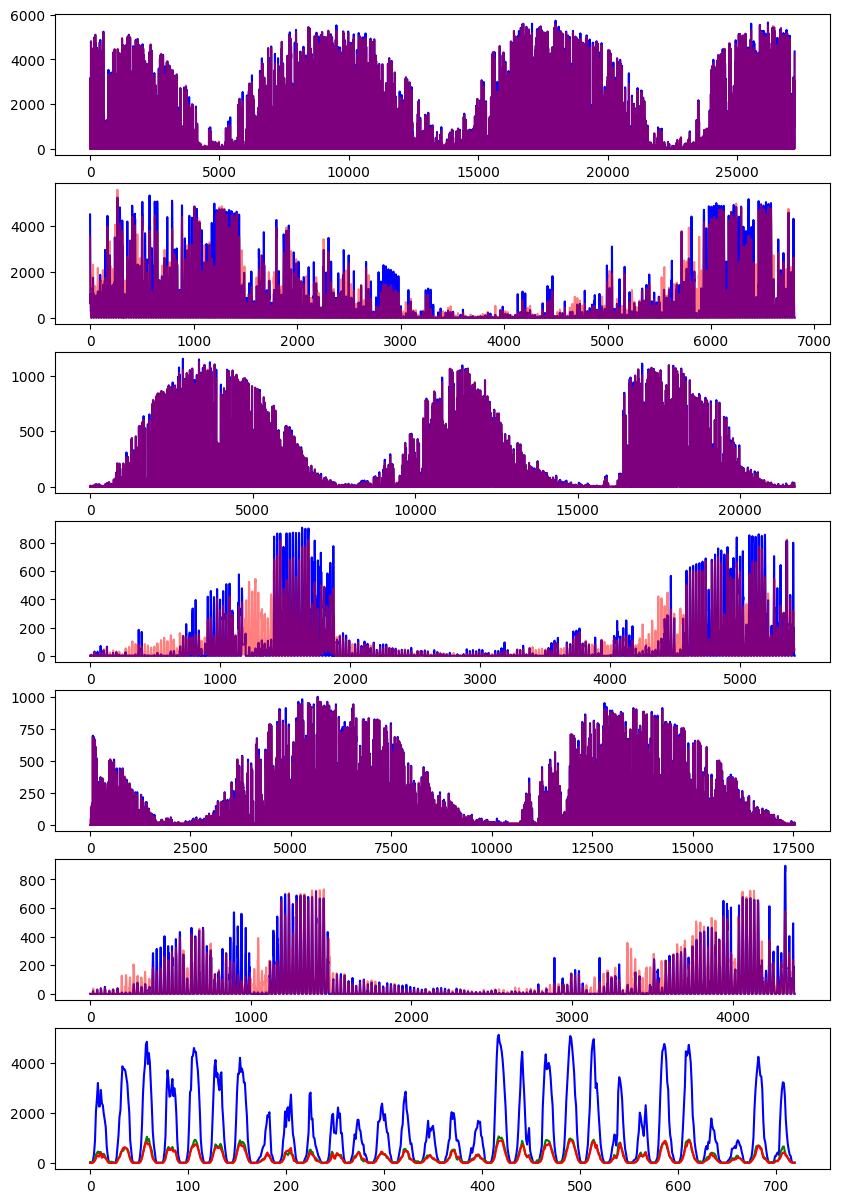

In [8]:
fig, axs = plt.subplots(7, figsize=(10, 15))

axs[0].plot(data.A.train_y, color="blue")
axs[0].plot(predictions_xg[0][0], color="red", alpha=0.5)

axs[1].plot(data.A.val_y, color="blue")
axs[1].plot(predictions_xg[0][1], color="red", alpha=0.5)

axs[2].plot(data.B.train_y, color="blue")
axs[2].plot(predictions_xg[1][0], color="red", alpha=0.5)

axs[3].plot(data.B.val_y, color="blue")
axs[3].plot(predictions_xg[1][1], color="red", alpha=0.5)

axs[4].plot(data.C.train_y, color="blue")
axs[4].plot(predictions_xg[2][0], color="red", alpha=0.5)

axs[5].plot(data.C.val_y, color="blue")
axs[5].plot(predictions_xg[2][1], color="red", alpha=0.5)

axs[6].plot(predictions_xg[0][2], color="blue")
axs[6].plot(predictions_xg[1][2], color="green")
axs[6].plot(predictions_xg[2][2], color="red")


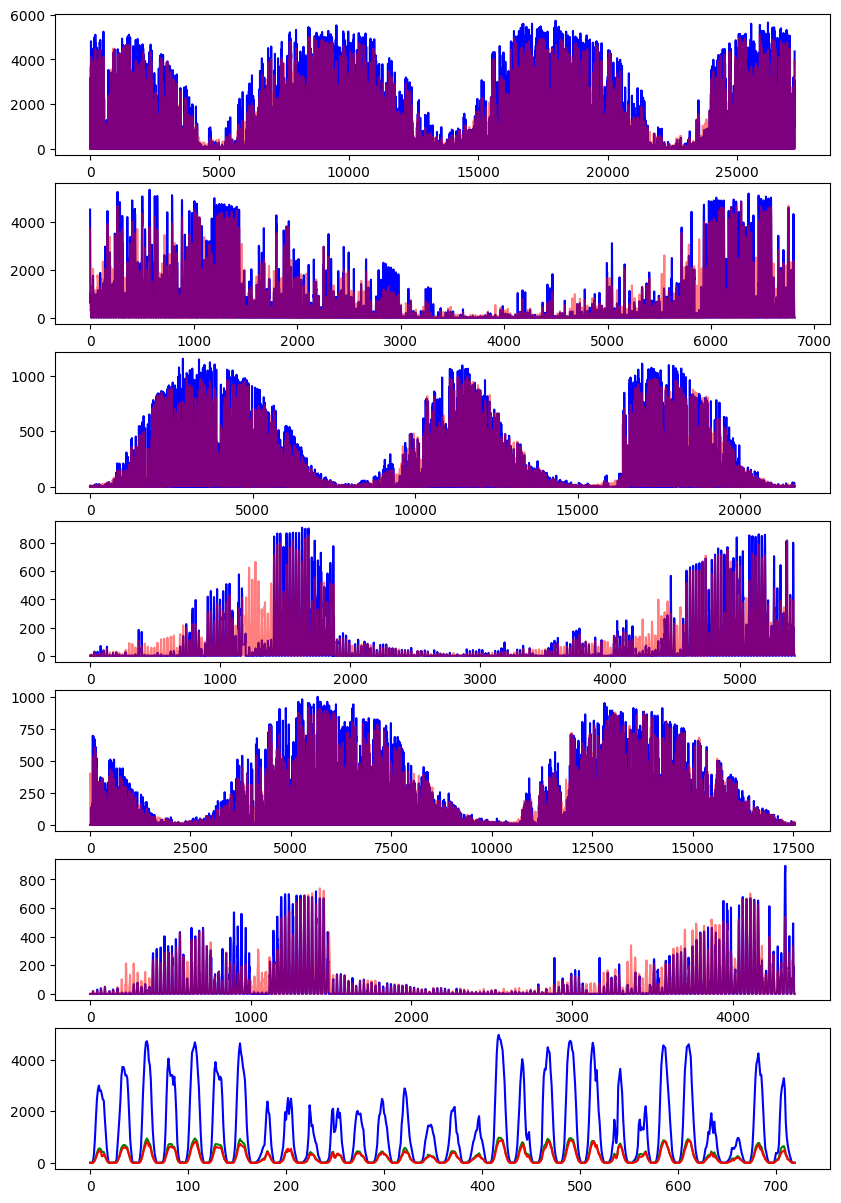

In [25]:
fig, axs = plt.subplots(7, figsize=(10, 15))

axs[0].plot(data.A.train_y, color="blue")
axs[0].plot(predictions_cb[0][0], color="red", alpha=0.5)

axs[1].plot(data.A.val_y, color="blue")
axs[1].plot(predictions_cb[0][1], color="red", alpha=0.5)

axs[2].plot(data.B.train_y, color="blue")
axs[2].plot(predictions_cb[1][0], color="red", alpha=0.5)

axs[3].plot(data.B.val_y, color="blue")
axs[3].plot(predictions_cb[1][1], color="red", alpha=0.5)

axs[4].plot(data.C.train_y, color="blue")
axs[4].plot(predictions_cb[2][0], color="red", alpha=0.5)

axs[5].plot(data.C.val_y, color="blue")
axs[5].plot(predictions_cb[2][1], color="red", alpha=0.5)

axs[6].plot(predictions_cb[0][2], color="blue")
axs[6].plot(predictions_cb[1][2], color="green")
axs[6].plot(predictions_cb[2][2], color="red")

In [21]:
avg = np.empty(shape=(3,3), dtype=np.ndarray)


for building in range(3):
    for dataset in range(3):
        current = (predictions_xg[building][dataset] + predictions_cb [building][dataset]) / 2.0
        avg[building][dataset] = current
        

        


69.36823216482702


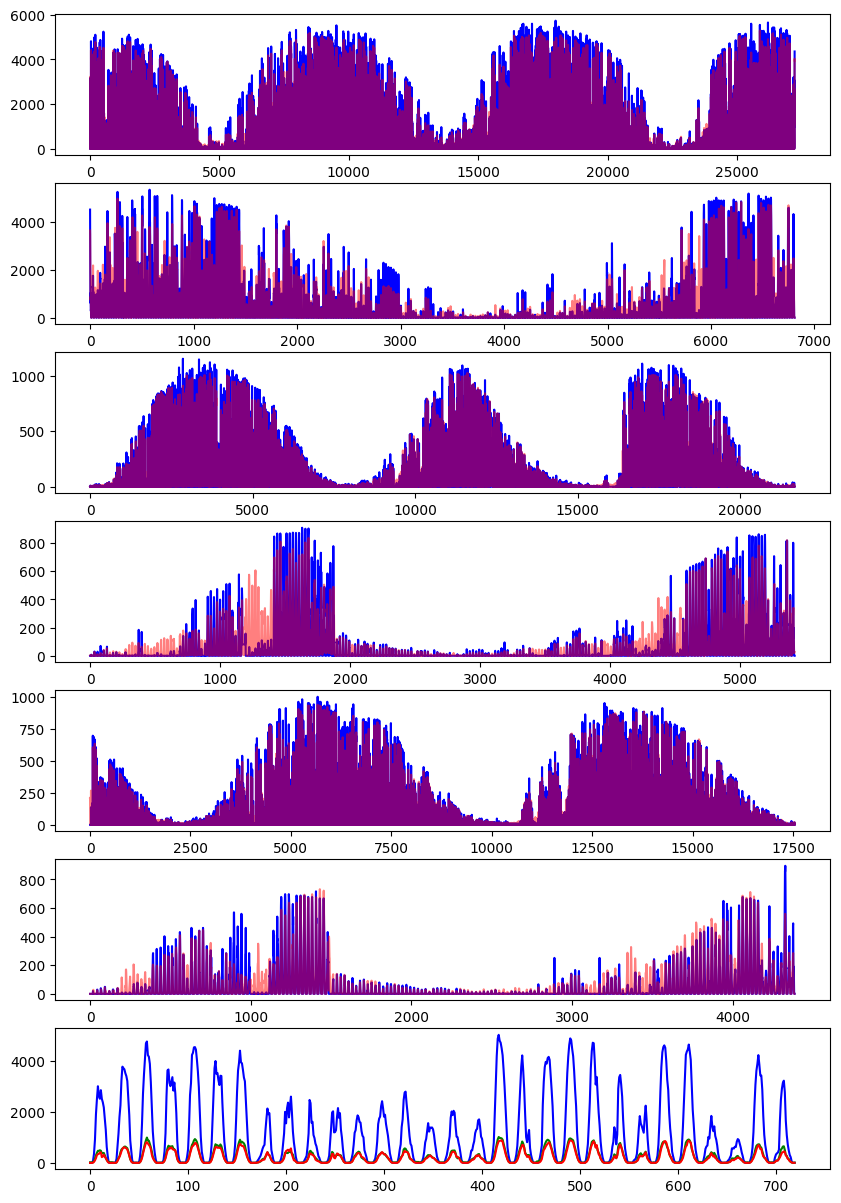

In [27]:
fig, axs = plt.subplots(7, figsize=(10, 15))

axs[0].plot(data.A.train_y, color="blue")
axs[0].plot(avg[0][0], color="red", alpha=0.5)

axs[1].plot(data.A.val_y, color="blue")
axs[1].plot(avg[0][1], color="red", alpha=0.5)

axs[2].plot(data.B.train_y, color="blue")
axs[2].plot(avg[1][0], color="red", alpha=0.5)

axs[3].plot(data.B.val_y, color="blue")
axs[3].plot(avg[1][1], color="red", alpha=0.5)

axs[4].plot(data.C.train_y, color="blue")
axs[4].plot(avg[2][0], color="red", alpha=0.5)

axs[5].plot(data.C.val_y, color="blue")
axs[5].plot(avg[2][1], color="red", alpha=0.5)

axs[6].plot(avg[0][2], color="blue")
axs[6].plot(avg[1][2], color="green")
axs[6].plot(avg[2][2], color="red")




mae_val_a = mean_absolute_error(data.A.val_y, avg[0][1])
mae_val_b = mean_absolute_error(data.B.val_y, avg[1][1])
mae_val_c = mean_absolute_error(data.C.val_y, avg[2][1])


print((mae_val_a + mae_val_b + mae_val_c) / 3)

In [28]:
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [29]:
submit = np.concatenate((np.concatenate((avg[0][2], avg[1][2])),avg[2][2]))

In [30]:
test['prediction'] = submit
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv("submissions/avg_1.csv", index=False)

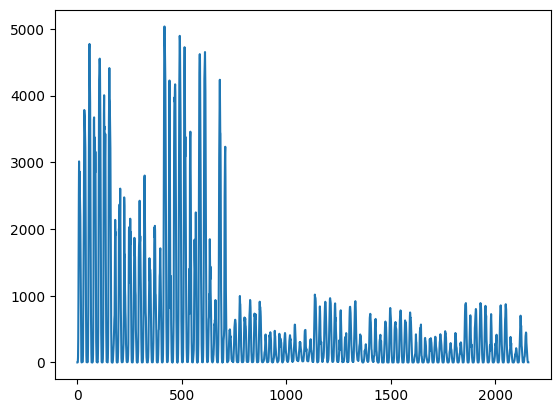

In [31]:
plt.plot(submit)